In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Liner regression:

$$ h(x) = w_0 + w_1*x $$

Напишіть функцію гіпотези лінійної регресії у векторному вигляді:

In [16]:
def h(X, w):
    return np.dot(X, w)

Cтворіть функцію для обчислення функції втрат у векторному вигляді:

In [17]:
def loss_function(X, y, w):
    m = X.shape[0]
    return np.square(h(X, w) - y).sum()/(2*m)

Pеалізуйте один крок градієнтного спуску:

In [18]:
def grad_step(w, grad_w, learning_rate=0.001):
    w = w - learning_rate*grad_w
    return w

In [19]:
def grad_w(X, y, w):
    m = X.shape[0]
    return np.dot(X.T, (h(X, w) - y)) / m

In [20]:
def grad_descent(w, X, y, num_iter=10000, learning_rate=0.001, epsilon=0.0000001):

    loss = loss_function(X, y, w)
    loss_history = [loss]

    for i in range(num_iter):
        w_best = None
        d_w = grad_w(X, y, w)
        w = grad_step(w, d_w, learning_rate=learning_rate)

        loss = loss_function(X, y, w)
        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            w_best = d_w
            break
        
        loss_history.append(loss)
        

    return w, w_best, loss_history

Знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень:

In [21]:
df = pd.read_csv("Housing.csv")

In [22]:
def normalization(data):
    return (data - data.mean())/data.std()

In [23]:
norm_df = pd.DataFrame()

norm_df["price"] = normalization(df["price"])
norm_df["area"] = normalization(df["area"])
norm_df["bathrooms"] = normalization(df["bathrooms"])
norm_df["bedrooms"] = normalization(df["bedrooms"])

In [24]:
X = norm_df[['area', 'bathrooms', 'bedrooms']].values
X = np.hstack((np.ones((X.shape[0], 1)) , X))
y = norm_df["price"].values.reshape(-1, 1)

n = X.shape[1]
w = np.linspace(0, 0, n).reshape((n, 1))

In [25]:
w, w_best, loss_history = grad_descent(w, X, y, 10000, learning_rate=0.001)
loss_best = loss_history[-1]
print('The best values w: ', w_best.flatten())
print('The best values of loss function: ', loss_best)

The best values w:  [-1.10818592e-16 -6.74033514e-03 -4.72771123e-03  5.66844067e-03]
The best values of loss function:  0.25605342833253486


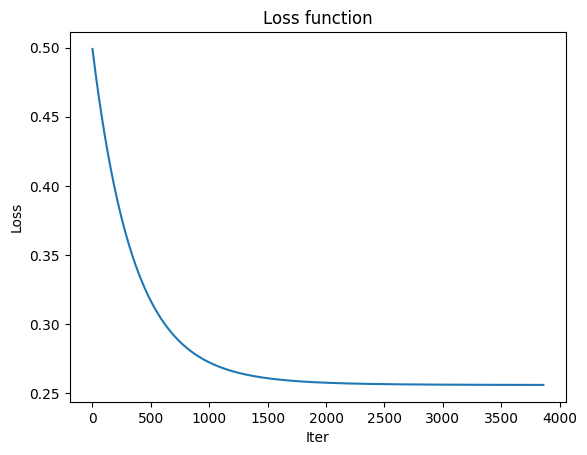

In [26]:
sns.lineplot(x=np.arange(len(loss_history)), y=[k for k in loss_history])
plt.title('Loss function')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

Знайдіть ці ж параметри за допомогою аналітичного рішення:

In [27]:
analitical_w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
analitical_loss = loss_function(X, y, analitical_w)
print('The best analitical w: ', analitical_w.flatten())
print('The best analitical loss function: ', analitical_loss)

The best analitical w:  [-1.50487262e-16  4.39452085e-01  3.72344423e-01  1.60528660e-01]
The best analitical loss function:  0.25598790065321403


Порівняйте отримані результати:

In [28]:
print('The best values of loss function: ', loss_best)
print('The best analitical loss function: ', analitical_loss)

The best values of loss function:  0.25605342833253486
The best analitical loss function:  0.25598790065321403
